# Final Python Project: Credit Risk Analysis

# 1. Introduction

<strong>Age</strong> (numeric) <br> 
<strong>Sex</strong> (text: male, female) <br>
<strong>Job</strong> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) ### tay nghề, và cư trú <br>
<strong>Housing</strong> (text: own, rent, or free) <br>
<strong>Saving accounts</strong> (text: little, moderate, quite rich, rich) <br>
<strong>Checking account</strong> (numeric, in DM - Deutsch Mark) ### đơn vị tiền tệ Đức <br>
<strong>Credit amount</strong> (numeric, in DM) <br>
<strong>Duration</strong> (numeric, in month) <br>
<strong>Purpose</strong> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) <br>
<strong>Risk</strong> (value target text: Good or Bad Risk) <br>

#

# 2. Import Library and Dataset

In [140]:
import pandas as pd #to dataset
import numpy as np #to math
import seaborn as sns #to graph that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings("ignore")

#Importing the data (và tạo index)
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

In [141]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


#

# 3. Fisrt Look at the data

* Looking the DATA TYPE
* NULL Numbers
* UNIQUE values
* The FRIST rows of our dataset

In [9]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


### Comment:
<strong>Age</strong> (numeric) <br> 
<strong>Sex</strong> (text: male, female) <br>
<strong>Job</strong> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) ### tay nghề, và cư trú <br>
<strong>Housing</strong> (text: own, rent, or free) <br>
<strong>Saving accounts</strong> (text: little, moderate, quite rich, rich) <br>
<strong>Checking account</strong> (numeric, in DM - Deutsch Mark) ### đơn vị tiền tệ Đức <br>
<strong>Credit amount</strong> (numeric, in DM) <br>
<strong>Duration</strong> (numeric, in month) <br>
<strong>Purpose</strong> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) <br>
<strong>Risk</strong> (value target text: Good or Bad Risk) <br>

In [10]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [11]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


#

# 4. Some explorations:

In [229]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [230]:
width_col = 0.2

trace0 = go.Bar(
    x = df_credit["Risk"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
    name='Good credit',
    width = [width_col, width_col]
)

trace1 = go.Bar(
    x = df_credit["Risk"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
    name='Bad credit',
    width = [width_col, width_col]
)

In [231]:
trace1 #test

Bar({
    'name': 'Bad credit', 'width': [0.2, 0.2], 'x': array(['good', 'bad'], dtype=object), 'y': array([300], dtype=int64)
})

In [232]:
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Risk Variable'),
    title='Target variable distribution',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked-bar')

#

# 4.1. Relationship between Age and Risk

In [278]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Age"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Age"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Age"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Age"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Age Variable'),
    title='Age Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Age-Grouped')

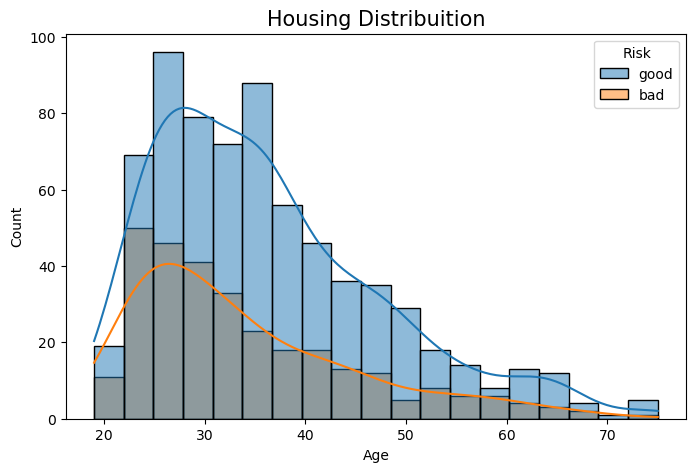

In [270]:
fig = plt.figure(figsize=(8,5))
g1 = sns.histplot(data=df_credit, x='Age', hue='Risk', kde=True)
g1.set_title("Age Distribuition", fontsize=15)
plt.show()

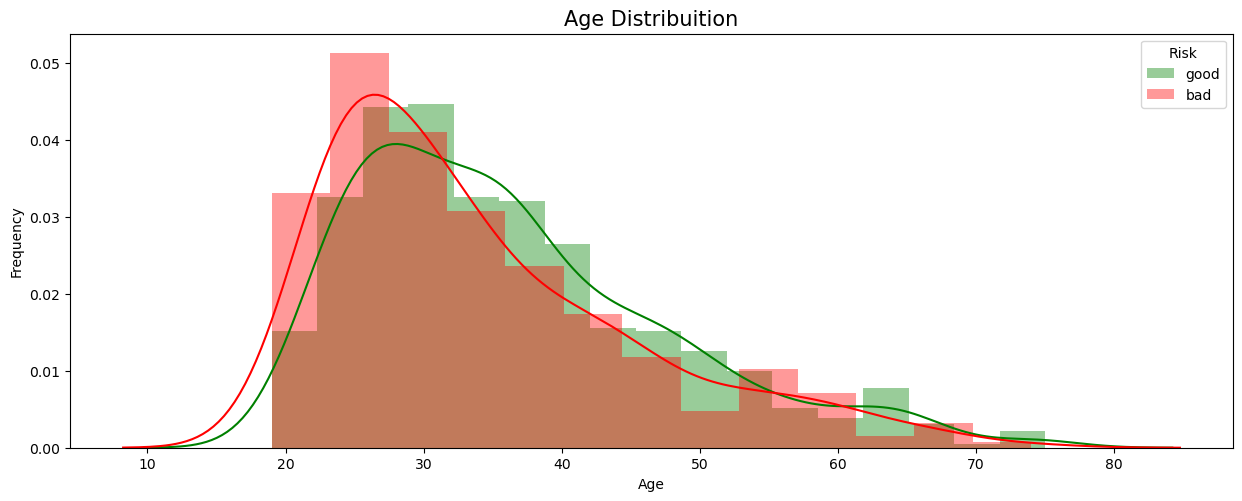

In [275]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], color="g", label="good")
g1 = sns.distplot(df_bad["Age"], color='r', label="bad")
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_ylabel("Frequency")

plt.legend(title="Risk") 
plt.show()

In [359]:
df = df_credit.copy()
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [360]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

In [361]:
# Ok we have to create for each group risky and non-risky loans.
df['Age group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] >= 18) & (col['Age'] < 23), 'Age group'] = 'student'
    col.loc[(col['Age'] >= 23) & (col['Age'] < 30), 'Age group'] = 'young'
    col.loc[(col['Age'] >= 30) & (col['Age'] < 40), 'Age group'] = 'u30'
    col.loc[(col['Age'] >= 40) & (col['Age'] < 50), 'Age group'] = 'u40'
    col.loc[(col['Age'] >= 50) & (col['Age'] < 60), 'Age group'] = 'u50'
    col.loc[col['Age']  >= 60                     , 'Age group'] = 'elder' 
    
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,student
2,49,male,1,own,little,NaN,2096,12,education,good,u40
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,u40
4,53,male,2,free,little,little,4870,24,car,bad,u50


In [362]:
x = ["student", "young", "u30", "u40", "u50", "elder"]

In [363]:
def compute_Credit_Amount(col1, filter1):
    amount_good = df['Credit amount'].loc[(df[col1] == filter1) & (df['Risk'] == 'good')].sum()
    amount_bad  = df['Credit amount'].loc[(df[col1] == filter1) & (df['Risk'] == 'bad')].sum()
    amount_all  = amount_good + amount_bad
    
    percent_good = amount_good/amount_all * 100
    percent_bad  = amount_bad /amount_all * 100
    
    percent_good = str(round(percent_good, 2))
    percent_bad  = str(round(percent_bad , 2))
    
    return  amount_all, amount_good, amount_bad, percent_good, percent_bad

In [364]:
student_all, student_good, student_bad, student_good_p, student_bad_p = compute_Credit_Amount("Age group", "student")
young_all  , young_good  , young_bad  , young_good_p  , young_bad_p   = compute_Credit_Amount("Age group", "young")
u30_all    , u30_good    , u30_bad    , u30_good_p    , u30_bad_p     = compute_Credit_Amount("Age group", "u30")
u40_all    , u40_good    , u40_bad    , u40_good_p    , u40_bad_p     = compute_Credit_Amount("Age group", "u40")
u50_all    , u50_good    , u50_bad    , u50_good_p    , u50_bad_p     = compute_Credit_Amount("Age group", "u50")
elder_all  , elder_good  , elder_bad  , elder_good_p  , elder_bad_p   = compute_Credit_Amount("Age group", "elder")

In [332]:
age_group_alls = [student_all, young_all, u30_all, u40_all, u50_all, elder_all]

In [366]:
group_age_good_loans = go.Bar(
    x=x,
    y=[student_good, young_good, u30_good, u40_good, u50_good, elder_good],
    name="Good Loans",
    text=[student_good_p + '%', young_good_p + '%', u30_good_p + '%', u40_good_p + '%', u50_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

In [367]:
group_age_bad_loans =  go.Bar(
    x=x,
    y=[student_bad, young_bad, u30_bad, u40_bad, u50_bad, elder_bad],
    name="Bad Loans",
    text=[student_bad_p + '%', young_bad_p + '%', u30_bad_p + '%', u40_bad_p + '%', u50_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

In [365]:
import plotly.express as px

fig = px.pie(df, values=age_group_alls, names=x,
             title='Group age')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 

In [369]:
group_age_data = [group_age_good_loans, group_age_bad_loans]

layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=group_age_data, layout=layout)

py.iplot(fig, filename='grouped-bar-direct-labels')

In [337]:
data = [good_loans, bad_loans]

layout = go.Layout(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount"),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked-bar')

# Summary Age and Risk:

* Nhóm người vai nhiều là: <strong>young, u30, u40</strong>, tổng cả 3 sấp sỉ ~ 82% 
* Nhóm có rủi ro cao là: <strong>young, u50</strong>, nằm trong khoảng 47% ~ 50%
* Nhóm có rủi ro thấp và vai nhiều là: <strong>u30, u40</strong>, nằm trong khoảng 26% ~ 30%
* Nhóm có rủi ro thấp và vai ít là: <strong>student, elder</strong>, nằm trong khoảng 32% ~ 37%

# Lí giải:

(Thịnh) <br>
Phát triển thêm 
* nhóm student là sinh viên chưa đi làm
* nhóm young từ 23-20: mới đi làm
* nhóm u50: đã già, bị sai thải nhiều
* nhóm elder: có lương hưu

#

# 4.2. Relationship betwenn House and Risk

In [277]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

* <strong>Free</strong> trong ngữ cảnh Housing: là người ở nhà miễn phí, có thể là thành viên của 1 gia đình

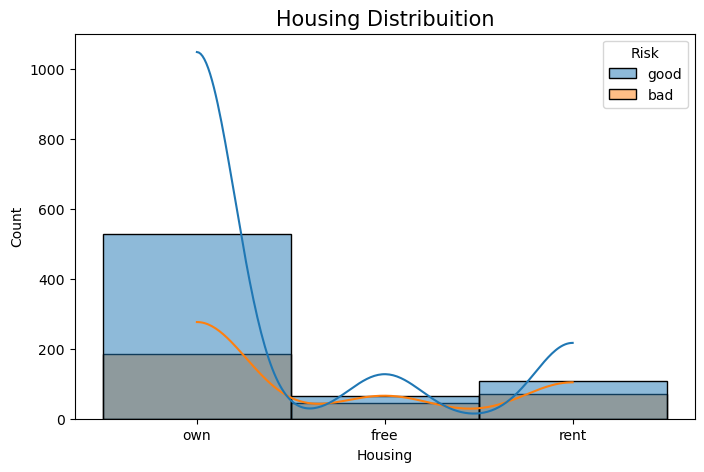

In [273]:
fig = plt.figure(figsize=(8,5))
g1 = sns.histplot(data=df_credit, x='Housing', hue='Risk', kde=True)
g1.set_title("Housing Distribuition", fontsize=15)
plt.show()

In [339]:
x = ["own", "free", "rent"]

In [340]:
own_all , own_good , own_bad , own_good_p , own_bad_p  = compute_Credit_Amount("Housing", "own")
free_all, free_good, free_bad, free_good_p, free_bad_p = compute_Credit_Amount("Housing", "free")
rent_all, rent_good, rent_bad, rent_good_p, rent_bad_p = compute_Credit_Amount("Housing", "rent")

In [341]:
housing_alls = [own_all, free_all, rent_all]

In [347]:
housing_good_loans = go.Bar(
    x=x,
    y=[own_good, free_good, rent_good],
    name="Good Loans",
    text=[own_good_p + '%', free_good_p + '%', rent_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
        opacity=0.6
)

In [348]:
housing_bad_loans =  go.Bar(
    x=x,
    y=[own_bad, free_bad, rent_bad],
    name="Bad Loans",
    text=[own_bad_p + '%', free_bad_p + '%', rent_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

In [349]:
import plotly.express as px

fig = px.pie(df, values=housing_alls, names=x,
             title='Hosing')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 

In [353]:
housing_data = [housing_good_loans, housing_bad_loans]

layout = dict(
    title="Type of Loan by Housing", 
    xaxis = dict(title="Housing"),
    yaxis= dict(title="Credit| Amount")
)

fig = dict(data=housing_data, layout=layout)

py.iplot(fig, filename='grouped-bar-direct-labels')

In [354]:
housing_data = [housing_good_loans, housing_bad_loans]

layout = go.Layout(
    title="Type of Loan by Housing", 
    xaxis = dict(title="Housing"),
    yaxis= dict(title="Credit Amount"),
    barmode='stack'
)

fig = go.Figure(data=housing_data, layout=layout)

py.iplot(fig, filename='stacked-bar')